In [6]:
from Collect.visualization import *
from DAL.data import *
from DAL.data_eval import *
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
from utils import *
load_env_variables()

In [6]:

experiments = extract_experiments()

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
experiments[0].keys()

dict_keys([<built-in function id>, 'created_at', 'error', 'fine_tuned_model', 'finished_at', 'hyperparameters', 'model', 'object', 'organization_id', 'result_files', 'status', 'trained_tokens', 'training_file', 'validation_file', 'training_file_name', 'validation_file_name', 'step', 'train_loss', 'train_accuracy', 'valid_loss', 'valid_mean_token_accuracy'])

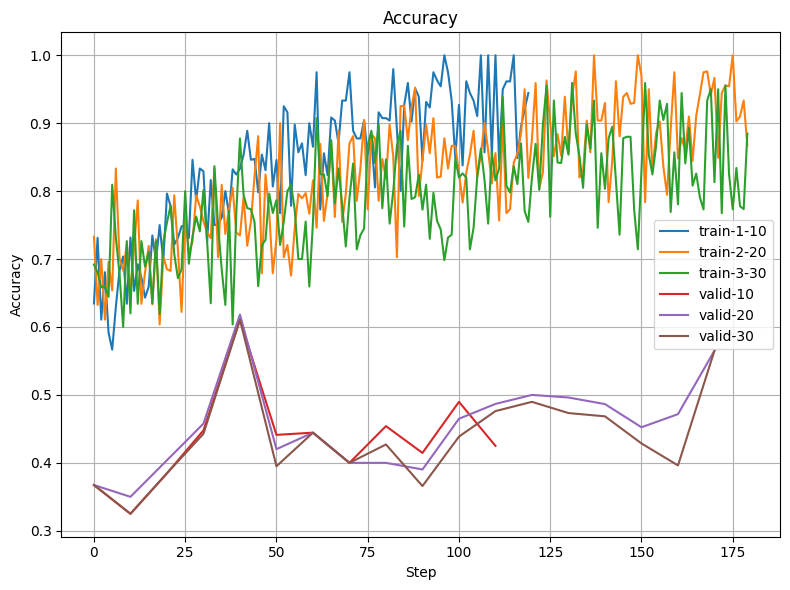

In [ ]:
names = [f"{exp['training_file_name'].split('/')[1].split('.')[0]}" for exp in experiments]
names += [f"{exp['validation_file_name'].split('/')[1].split('.')[0]}" for exp in experiments]

accuracy = [exp['train_accuracy'] for exp in experiments]
accuracy += [exp['valid_mean_token_accuracy'] for exp in experiments]


plot_dictionaries(accuracy, names, figsize=(8, 6), title="Accuracy", xlabel="Step", ylabel="Accuracy")

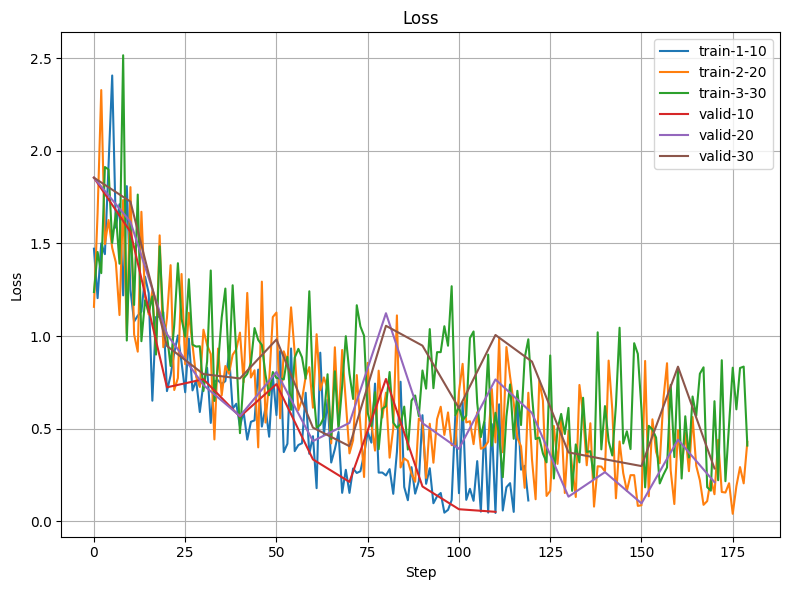

In [ ]:
loss = [exp['train_loss'] for exp in experiments]
loss += [exp['valid_loss'] for exp in experiments]

plot_dictionaries(loss, names, figsize=(8, 6), title="Loss", xlabel="Step", ylabel="Loss")

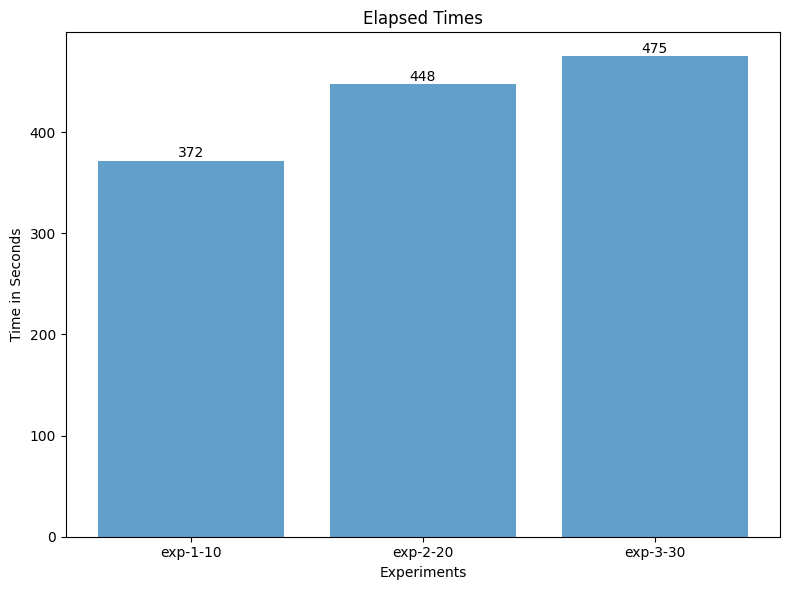

In [ ]:
names = [f"{exp['training_file_name'].split('/')[1].split('.')[0]}".replace('train', 'exp') for exp in experiments]
elapsed_times = [exp['finished_at']-exp['created_at'] for exp in experiments]
bar_plot_with_names(elapsed_times, names, title="Elapsed Times", xlabel="Experiments", ylabel="Time in Seconds", figsize=())

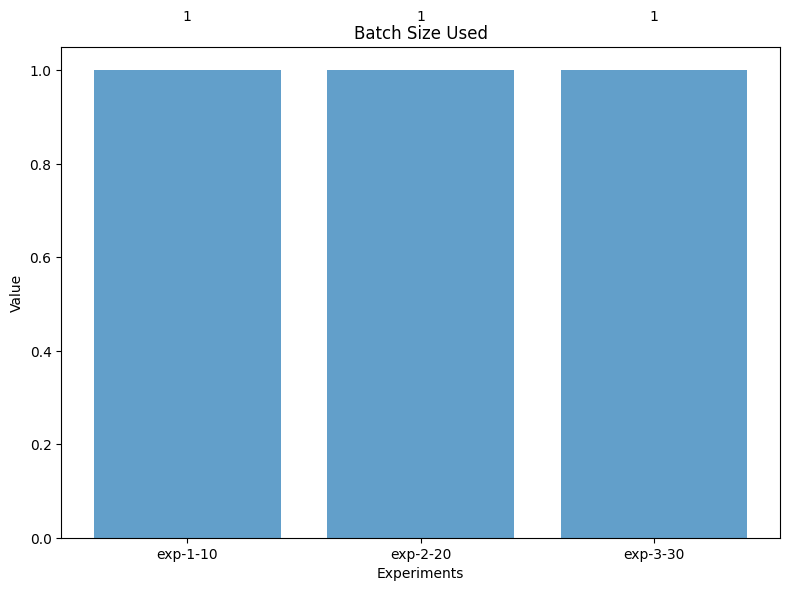

In [ ]:
batch_sizes = [exp['hyperparameters']['batch_size'] for exp in experiments]
bar_plot_with_names(batch_sizes, names, title="Batch Size Used", xlabel="Experiments", ylabel="Value")

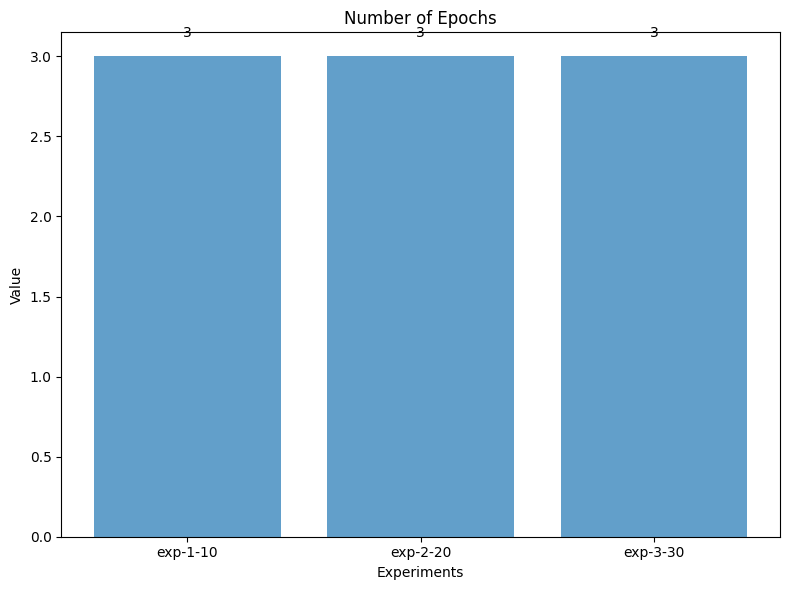

In [ ]:
epochs = [exp['hyperparameters']['n_epochs'] for exp in experiments]
bar_plot_with_names(epochs, names, title="Number of Epochs", xlabel="Experiments", ylabel="Value")

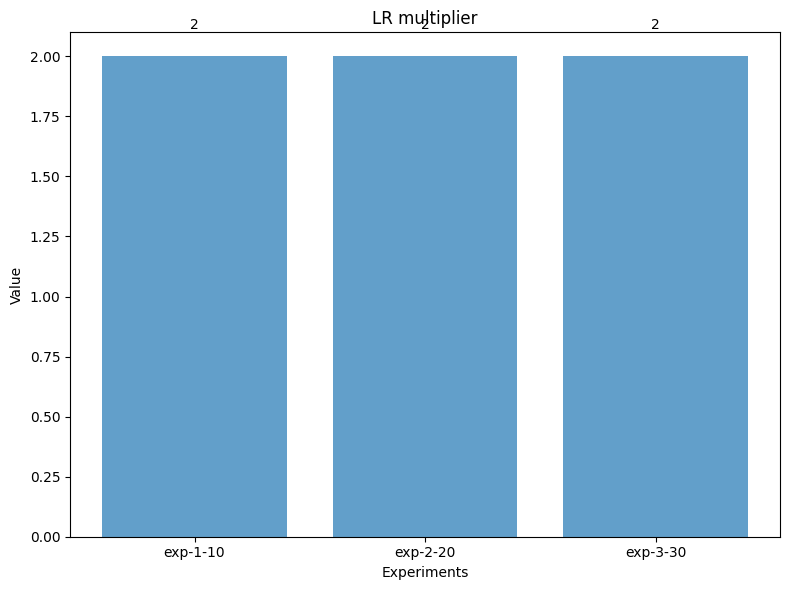

In [ ]:
lrm = [exp['hyperparameters']['learning_rate_multiplier'] for exp in experiments]
bar_plot_with_names(lrm, names, title="LR multiplier", xlabel="Experiments", ylabel="Value")

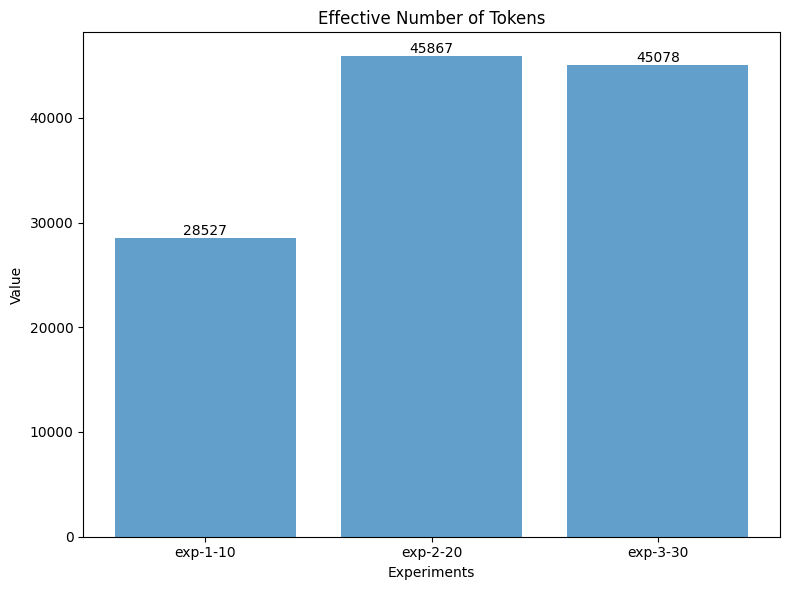

In [ ]:
tokens = [exp['trained_tokens'] for exp in experiments]
bar_plot_with_names(tokens, names, title="Effective Number of Tokens", xlabel="Experiments", ylabel="Value")

In [20]:
sample_dict = readable_sample(5)
sample_dict.pop('Unnamed: 0')
sample_dict.pop('question_1')
sample_dict.pop('question_2')
df = pd.DataFrame(sample_dict)
ans = lambda q:provide_answer(q, model_name="gpt-3.5-turbo-1106")
df['predict'] = df['question_3'].apply(ans)
bl1 = lambda reference, candidate: sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
bl2 = lambda reference, candidate: sentence_bleu(reference, candidate, weights=(0, 1, 0, 0))
bl3 = lambda reference, candidate: sentence_bleu(reference, candidate, weights=(0, 0, 1, 0))
bl4 = lambda reference, candidate: sentence_bleu(reference, candidate, weights=(0, 0, 0, 1))
df['BLEU-1'] = df.apply(lambda row:bl1(row['fact'].split(), row['predict'][0].split()), axis=1)
df['BLEU-2'] = df.apply(lambda row:bl2(row['fact'].split(), row['predict'][0].split()), axis=1)
df['BLEU-3'] = df.apply(lambda row:bl3(row['fact'].split(), row['predict'][0].split()), axis=1)
df['BLEU-4'] = df.apply(lambda row:bl4(row['fact'].split(), row['predict'][0].split()), axis=1)
pd.to_exel('human_comparison.xlsx', index=False)


KeyboardInterrupt: 

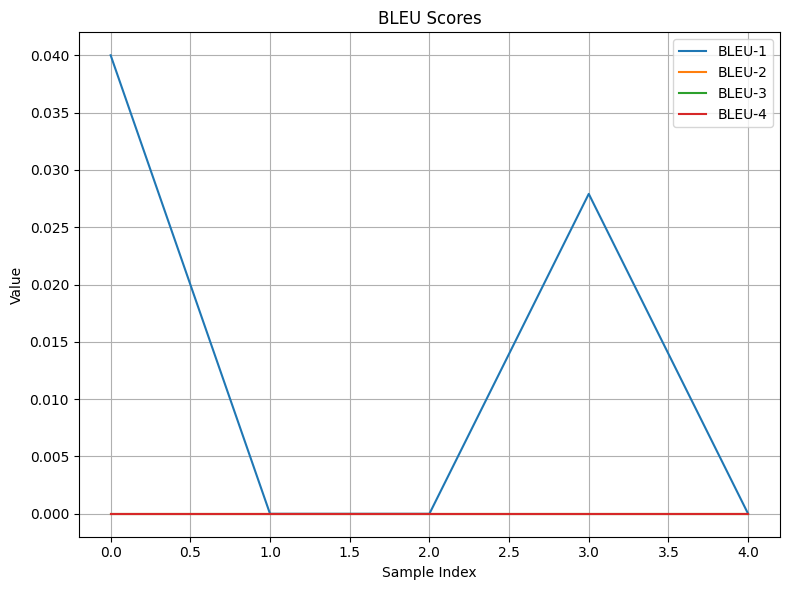

In [16]:
BLEUs = [df['BLEU-1'].to_dict(), df['BLEU-2'].to_dict(), df['BLEU-3'].to_dict(), df['BLEU-4'].to_dict()]
names = ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4']
plot_dictionaries(BLEUs, names, figsize=(8, 6), title="BLEU Scores", xlabel="Sample Index", ylabel="Value")

In [13]:
datasets_stats = {}
for count in range(10, 101, 10):
    for para in range(1, 3):
        temp_train, temp_valid = create_subset(para, count)
        train_stats = eval_dataset(temp_train)
        datasets_stats[f'train-{para}-{count}']=train_stats
        valid_stats = eval_dataset(temp_valid)
        datasets_stats[f'valid-{para}-{count}']=valid_stats




In [14]:
datasets_stats['train-2-100']

{'length': 300,
 'format_errors': defaultdict(int, {}),
 'n_missing_system': 0,
 'n_missing_user': 0,
 'num_messages_per_example': {'min': 3,
  'max': 3,
  'mean': 3.0,
  'median': 3.0,
  'p5': 3.0,
  'p95': 3.0},
 'num_total_tokens_per_example': {'min': 144,
  'max': 503,
  'mean': 246.94666666666666,
  'median': 226.5,
  'p5': 172.0,
  'p95': 349.0},
 'num_assistant_tokens_per_example': {'min': 2,
  'max': 335,
  'mean': 102.16,
  'median': 79.5,
  'p5': 29.800000000000004,
  'p95': 199.9000000000002},
 'n_billing_tokens_in_dataset': 74084,
 'n_epochs': 3}